In [34]:
import sympy
from sympy.stats import Normal, density, E, Variance
from sympy.plotting import plot
sympy.init_printing()

In [13]:
rho_opal, rho_quartz, sigma1, sigma2, rho = sympy.symbols('rho_opal, rho_quartz, sigma1, sigma2, rho', real=True, positive=True)
x1_obs, x2_obs = sympy.symbols('x1_obs, x2_obs', real=True)
qvalue_opal = sympy.symbols('qvalue_opal', real=True)

In [49]:
model1 = Normal('X1', rho, sigma1)
model2 = Normal('X2', rho, sigma2)
model = sympy.simplify(density(model1)(x1_obs) * density(model2)(x2_obs))

model_opal = model.subs({rho: rho_opal})
model_quartz = model.subs({rho: rho_quartz})

nll_opal = sympy.simplify(-sympy.log(model_opal))
nll_quartz = sympy.simplify(-sympy.log(model_quartz))

qvalue_obs = sympy.factor(2 * (nll_opal - nll_quartz))

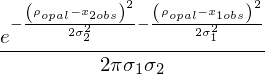

In [50]:
model_opal

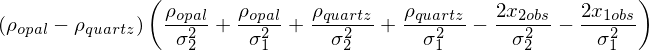

In [55]:
qvalue_obs

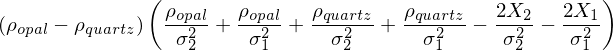

In [6]:
X1_opal = model1.subs({rho: rho_opal})
X2_opal = model2.subs({rho: rho_opal})
X1_quartz = model1.subs({rho: rho_quartz})
X2_quartz = model2.subs({rho: rho_quartz})

q_random_variable_opal = qvalue_obs.subs({x1_obs: X1_opal, x2_obs:X2_opal})
q_random_variable_quartz = qvalue_obs.subs({x1_obs: X1_quartz, x2_obs:X2_quartz})

q_random_variable_opal

In [ ]:
density(q_random_variable_opal)

In [14]:
qvalue_opal_pdf = sympy.simplify(density(- 2 * X2_opal / sigma2 ** 2 - 2 * X1_opal / sigma1 ** 2)(qvalue_opal))

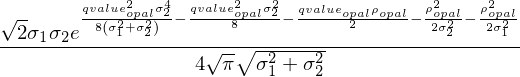

In [41]:
qvalue_opal_pdf

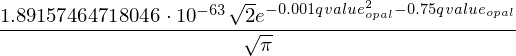

In [68]:
qvalue_opal_pdf.subs({rho_opal:1.5, rho_quartz:1.7, sigma1:0.1, sigma2:0.2})

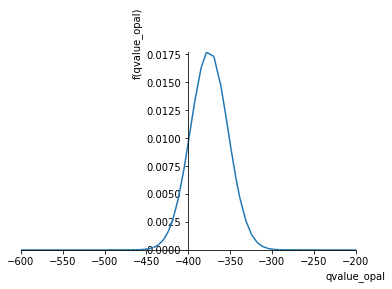

In [64]:
plot(qvalue_opal_pdf.subs({rho_opal:1.5, rho_quartz:1.7, sigma1:0.1, sigma2:0.2}), (qvalue_opal, -600, -200))

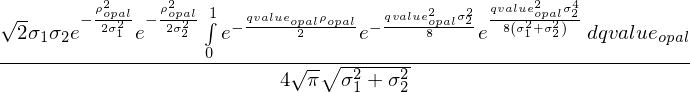

In [19]:
sympy.integrate(qvalue_opal_pdf, (qvalue_opal, 0, 1))

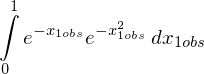

In [69]:
sympy.integrate(sympy.exp(-x1_obs**2 - x1_obs), (x1_obs, 0, 1))

In [32]:
E(q_random_variable_opal)

KeyboardInterrupt: 